In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file='C:/Users/DELL/Desktop/New folder/Iris.csv'
df=pd.read_csv(file)

In [3]:
x=df[['SepalLengthCm','SepalWidthCm']]
y=df['Species']

In [4]:
df.head()
df.shape

(150, 6)

In [5]:
df_setosa=df.loc[df['Species']=='Iris-setosa']

<Axes: xlabel='Species', ylabel='count'>

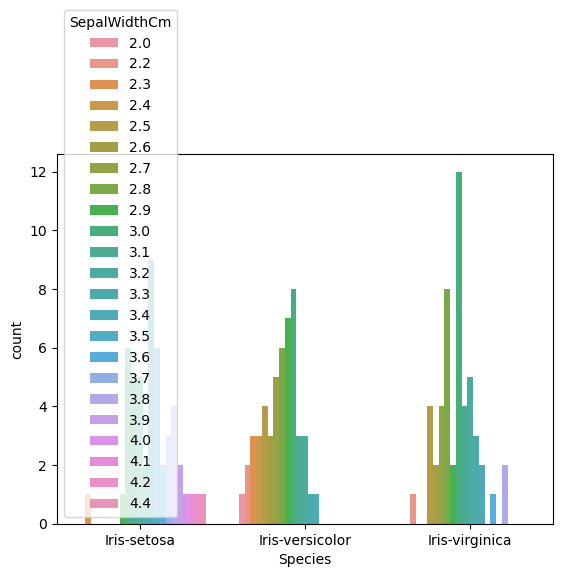

In [6]:
sns.countplot(x="Species",hue='SepalWidthCm',data=df)

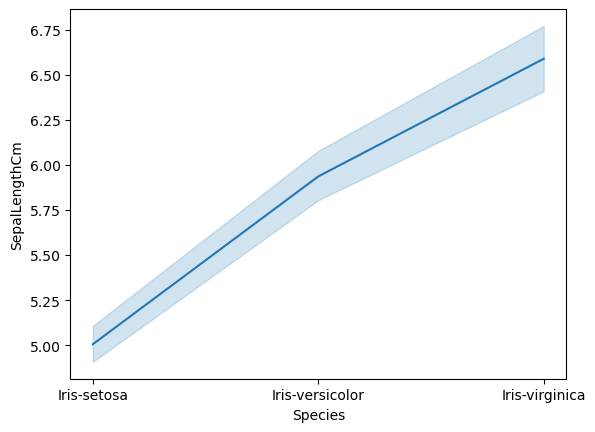

In [7]:
sns.lineplot(x="Species",y="SepalLengthCm",data=df)
plt.show()

<Axes: xlabel='Id', ylabel='PetalWidthCm'>

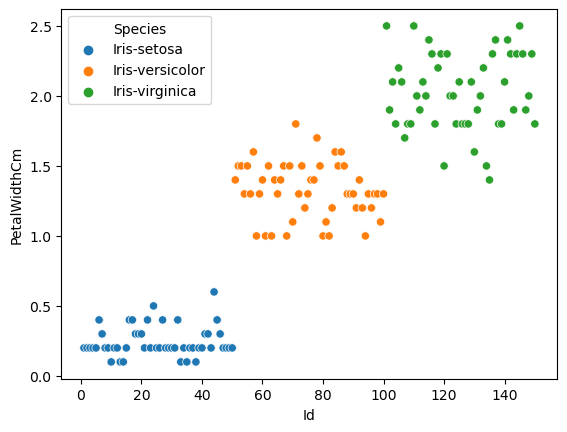

In [8]:
sns.scatterplot(x="Id",y="PetalWidthCm",hue="Species",data=df)

Text(0.5, 0, 'Iris-versicolor')

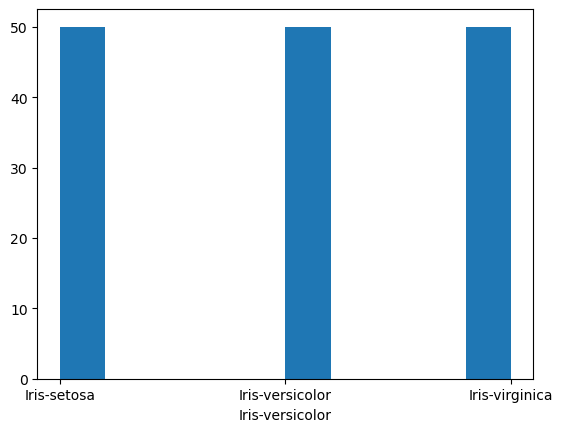

In [9]:
plt.hist(x="Species",data=df)
plt.xlabel("Irissetosa")
plt.xlabel("Iris-versicolor")

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

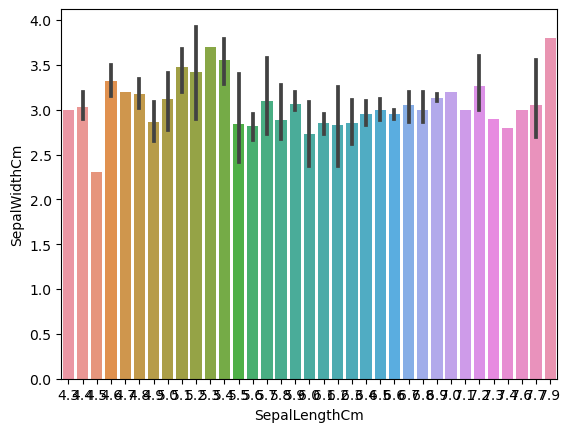

In [10]:
sns.barplot(x="SepalLengthCm",y="SepalWidthCm",data=df)

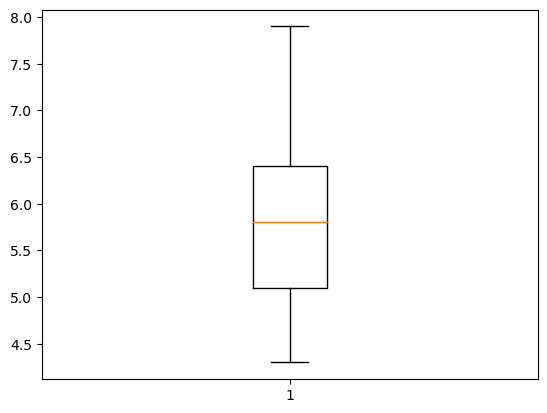

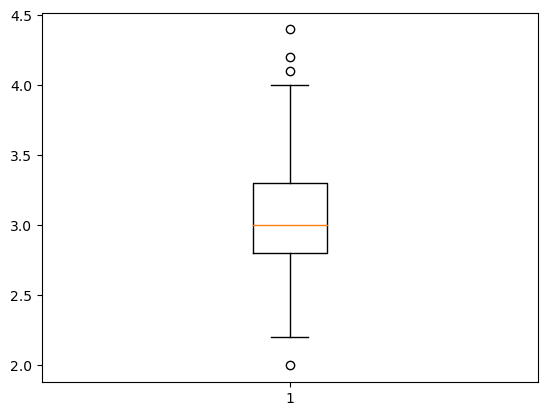

In [11]:
#Checking for outliars
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([df['SepalLengthCm']])
plt.figure(2)
plt.boxplot([df['SepalWidthCm']])
plt.show()

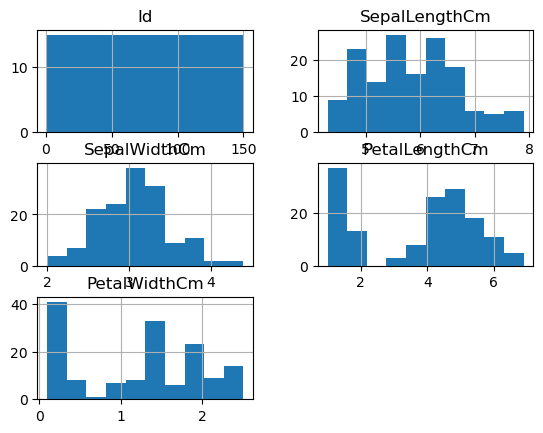

In [12]:
df.hist()
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

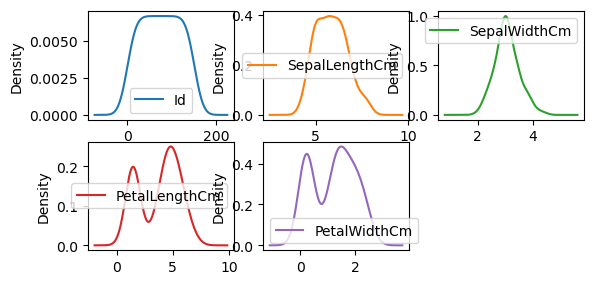

In [13]:
df.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

Id                  Axes(0.125,0.53;0.133621x0.35)
SepalLengthCm    Axes(0.285345,0.53;0.133621x0.35)
SepalWidthCm      Axes(0.44569,0.53;0.133621x0.35)
PetalLengthCm    Axes(0.606034,0.53;0.133621x0.35)
PetalWidthCm     Axes(0.766379,0.53;0.133621x0.35)
dtype: object

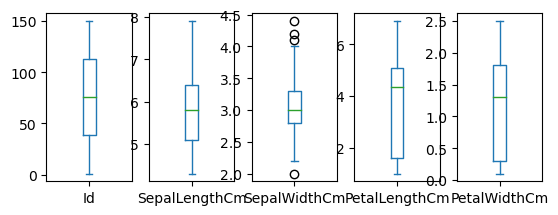

In [14]:
df.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

In [15]:
#Correlation 
corr_mat = df.corr()
print(corr_mat)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


C:\Users\DELL\AppData\Local\Temp\ipykernel_9828\4195509048.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


In [16]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [17]:
train, test = train_test_split(df, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [18]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
test_y = test.Species

In [19]:
test_y.head()

106     Iris-virginica
141     Iris-virginica
57     Iris-versicolor
31         Iris-setosa
93     Iris-versicolor
Name: Species, dtype: object

In [20]:
test_y.head()

106     Iris-virginica
141     Iris-virginica
57     Iris-versicolor
31         Iris-setosa
93     Iris-versicolor
Name: Species, dtype: object

In [21]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9736842105263158


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)

Confusion matrix: 
 [[11  0  0]
 [ 0 14  0]
 [ 0  1 12]]


In [23]:
count =  df.Species.value_counts()
print(count)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [24]:
lab = df.Species.unique().tolist()
lab

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

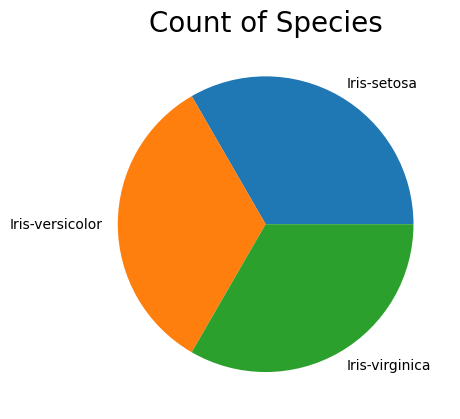

In [25]:
plt.pie(count,labels=lab)
plt.title("Count of Species",fontsize=20)
plt.show()

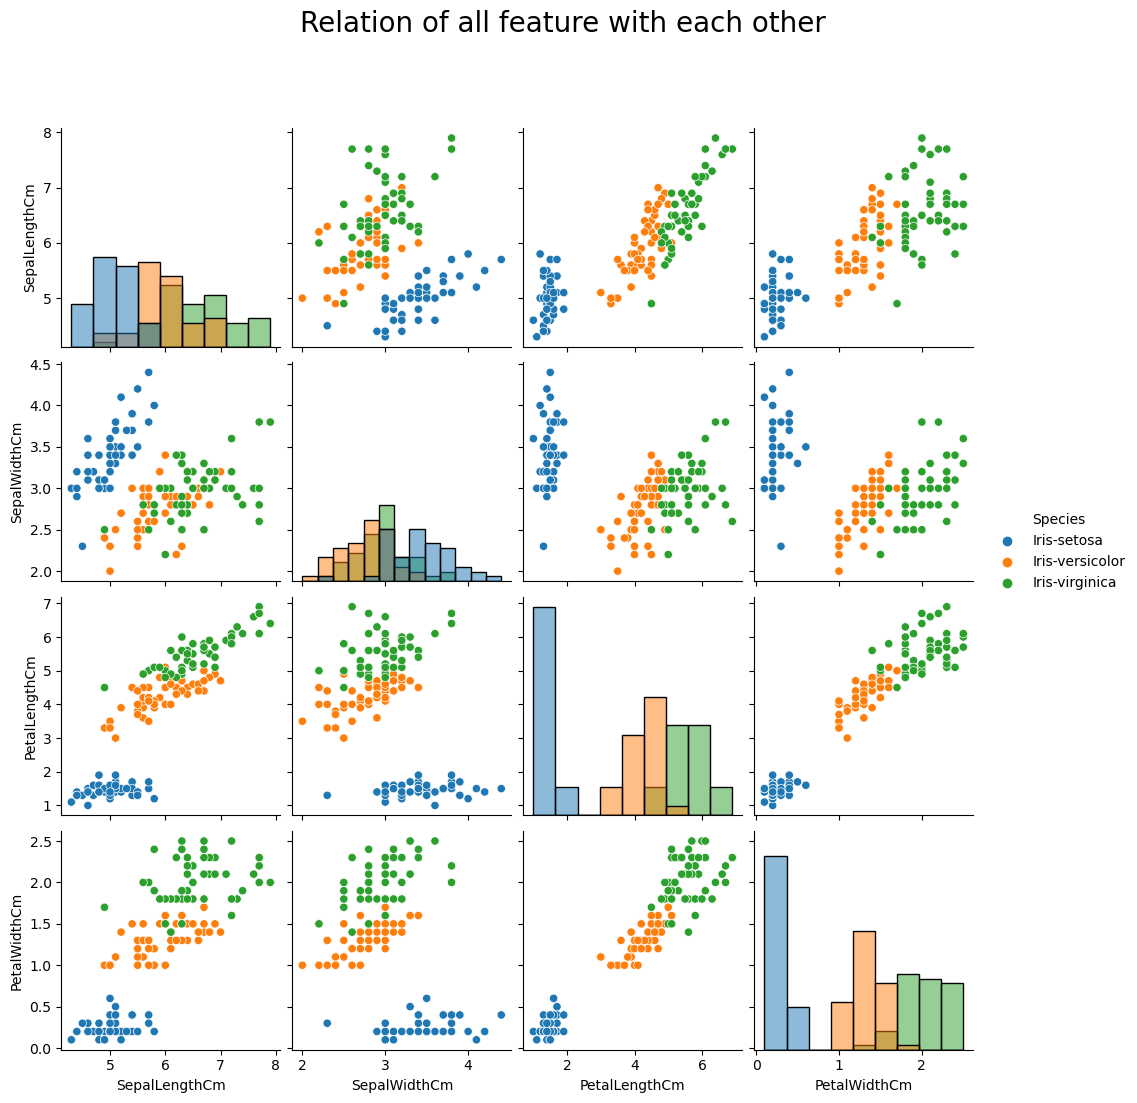

In [28]:
df1 = df.drop("Id",axis=1)
plot=sns.pairplot(df1,hue="Species",diag_kind="hist")
plot.fig.suptitle("Relation of all feature with each other",y=1.1,fontsize=20)
plt.show()

In [29]:
x =df.drop(columns=['Species'])
y =df['Species']

# 70% of dataset will we used for training and rest 30% will be used for testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


In [30]:
# Appying decision tree algorithm on our Dataset

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model = model.fit(x_train, y_train)

In [31]:
print("Accuracy: ", model.score(x_test, y_test)*100)

Accuracy:  100.0
